In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

inputImg=cv2.imread("../data/inputs/1430618662_c95e60bfac_o.png",0)
#inputImg= cv2.cvtColor(inputImg, cv2.COLOR_BGR2RGB)
refImg=cv2.imread("../data/inputs/9435356177_0037caecca_o.png",0)
#refImg= cv2.cvtColor(refImg, cv2.COLOR_BGR2RGB)





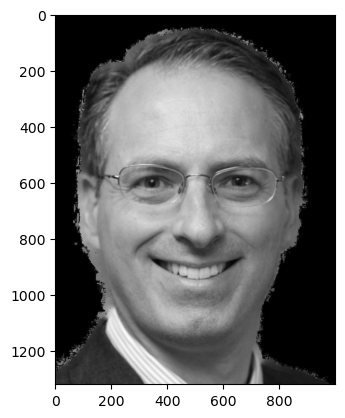

In [ ]:
plt.imshow(inputImg,cmap="gray")

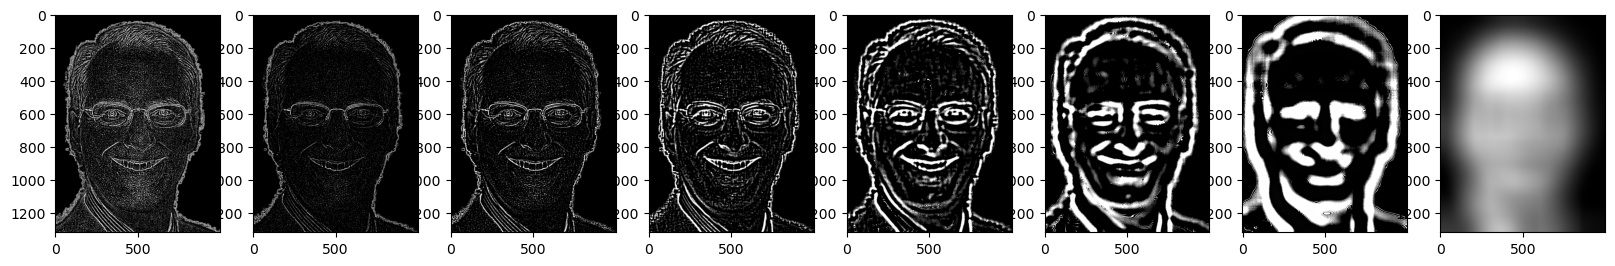

In [6]:

def lapStack(inputImg):
    h,w=np.shape(inputImg)
    noOfLevels=7
    lapStack=np.empty((h,w,noOfLevels))

    lap=[]
    for i in range(0,noOfLevels):
        k=2*(2**i)+1
        #k=37
        gaBlur1=cv2.GaussianBlur(inputImg,(k,k),2**i,2**i)
        gaBlur2=cv2.GaussianBlur(inputImg,(k,k),2**(i+1),2**(i+1))
        if(i==0):
            lap.append(inputImg-gaBlur2)
        else:
            lap.append(gaBlur1-gaBlur2)

    gaBlur2=cv2.GaussianBlur(inputImg,(2*(2**(noOfLevels))+1,2*(2**(noOfLevels))+1),2**(noOfLevels),2**(noOfLevels))
    lap.append(gaBlur2)
    return lap
lapIn=lapStack(inputImg)
fig = plt.figure(figsize=(20, 20))
for i in range(8):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(lapIn[i],cmap="gray")

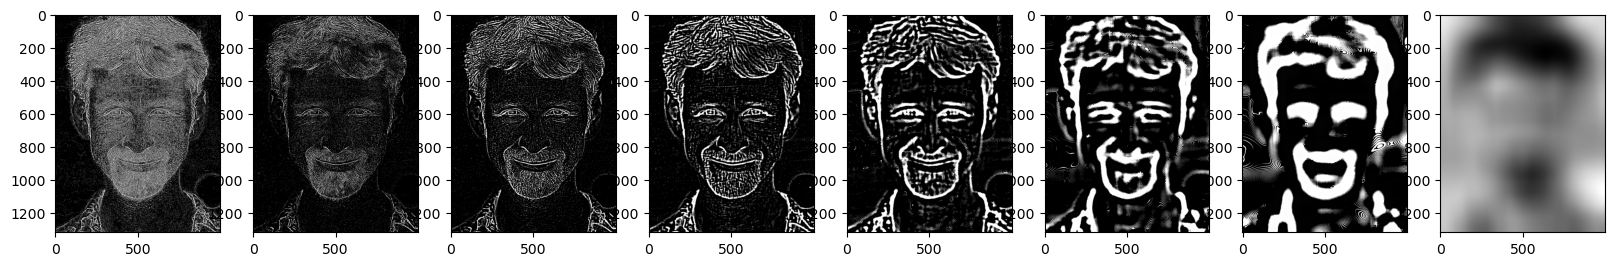

In [8]:
lapRef=lapStack(refImg)
fig = plt.figure(figsize=(20, 20))
for i in range(8):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(lapRef[i],cmap="gray")

In [172]:
""" def gausStack(inputImg,noOfLevels=7):
    h,w=np.shape(inputImg)
    #noOfLevels=7
    lapStack=[]

    for i in range(noOfLevels):
        sigma1=2**i
        sigma2=2**(i+1)
        k1=6*sigma1
        k2=6*sigma2
        kern=cv2.getGaussianKernel(ksize=k2,sigma=sigma2)
        gaBlur2=cv2.filter2D(inputImg,ddepth=-1,kernel=kern)            
        if(i==0):
            lapStack.append(inputImg-gaBlur2)
        else:
            kern=cv2.getGaussianKernel(ksize=k1,sigma=sigma1)
            gaBlur1=cv2.filter2D(inputImg,ddepth=-1,kernel=kern)
            lapStack.append(gaBlur1-gaBlur2)
    
    sigmaR=2**noOfLevels
    #kR=(20*sigmaR-7)//3
    kR=6*sigmaR
    kernR=cv2.getGaussianKernel(ksize=kR,sigma=sigmaR)
    gaRes=cv2.filter2D(inputImg,ddepth=-1,kernel=kernR)
    lapStack.append(gaRes)                    
    return lapStack
 """

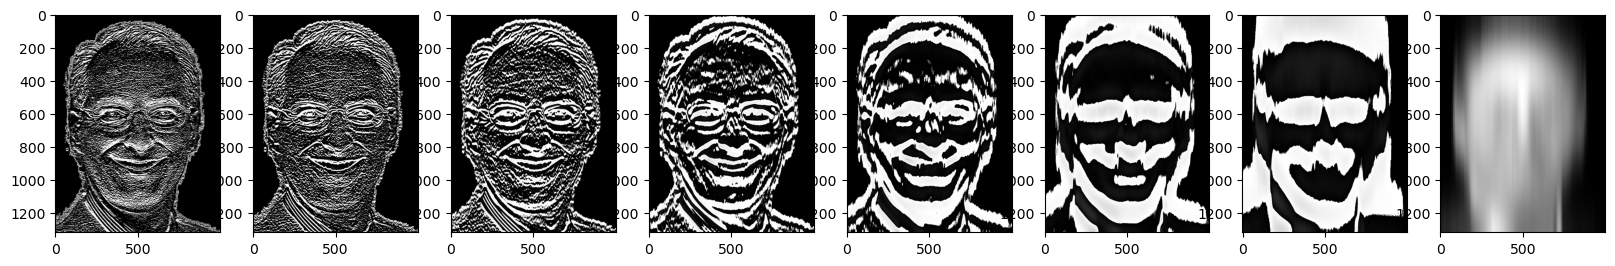

In [173]:
""" fig = plt.figure(figsize=(20, 20))

lapStacki=gausStack(inputImg)  

for i in range(8):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(lapStacki[i],cmap="gray") """

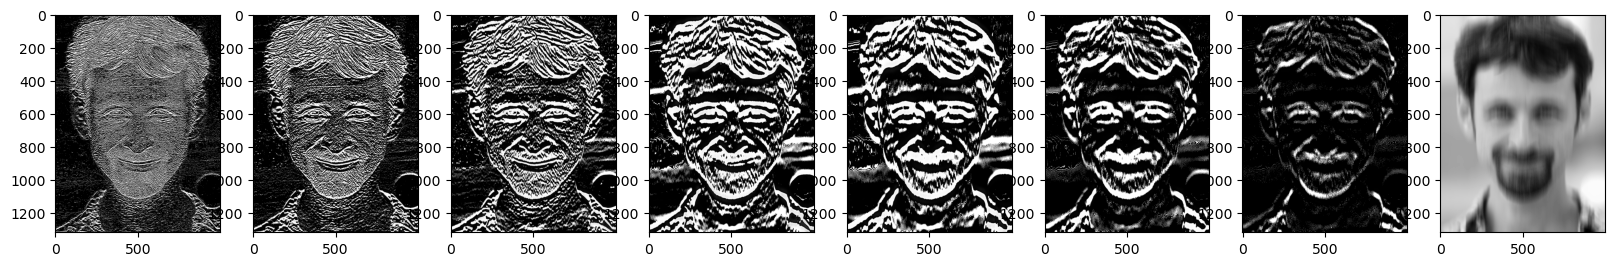

In [144]:
""" fig = plt.figure(figsize=(20, 20))

lapStackr=gausStack(refImg)  

for i in range(8):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(lapStackr[i],cmap="gray") """

In [5]:

def localEnergyStack(gausStack,noOfLevels=7):
    S=[]
    #gausStack=np.array(gausStack)
    #gausStackSq=np.square(gausStack)
    gausStackSq=[i**2 for i in gausStack]
    
    for i in range(noOfLevels):
        S.append(cv2.GaussianBlur(gausStackSq[i],(61,61),2**(i+1),2**(i+1)))
    
    return S

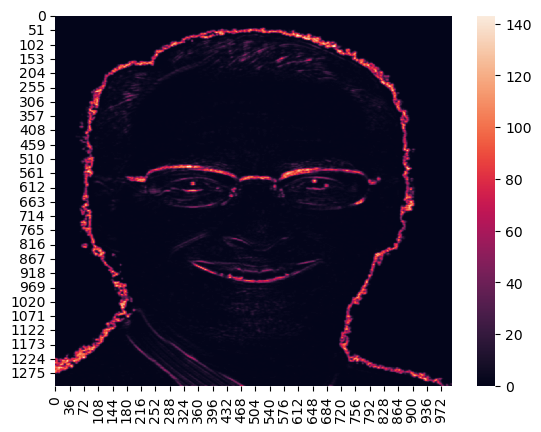

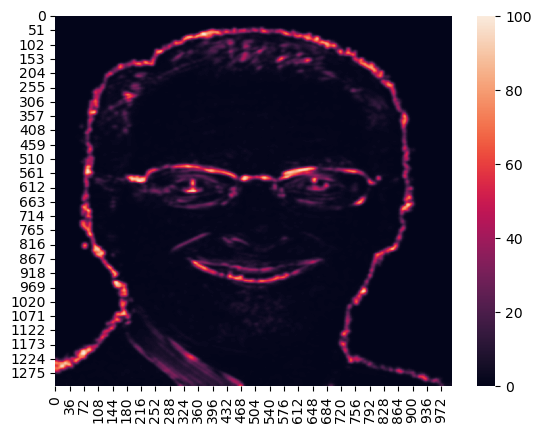

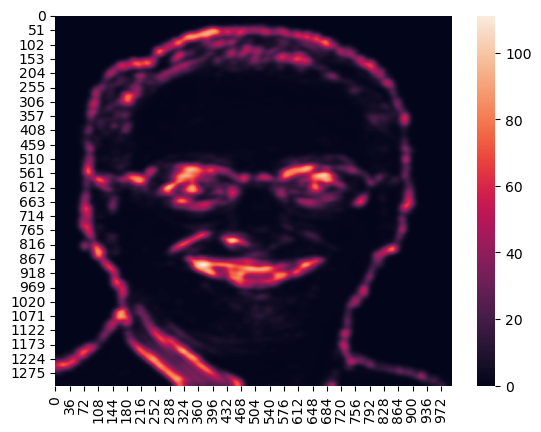

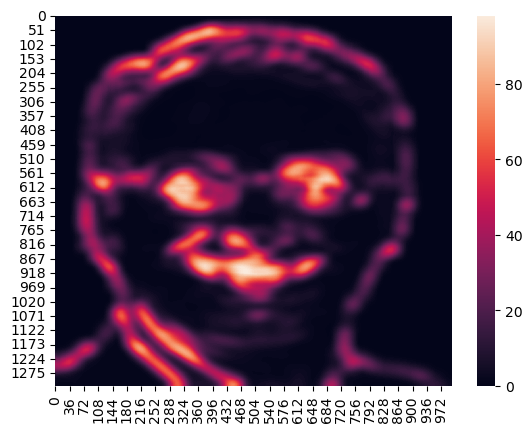

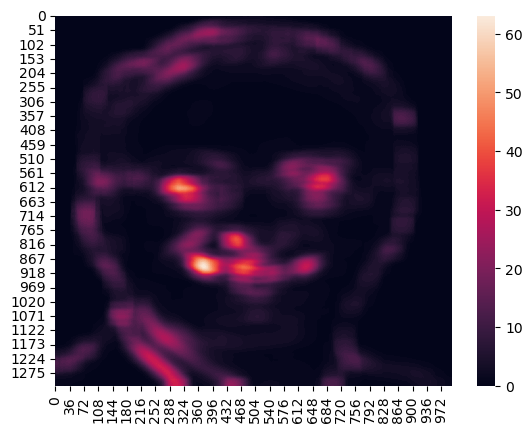

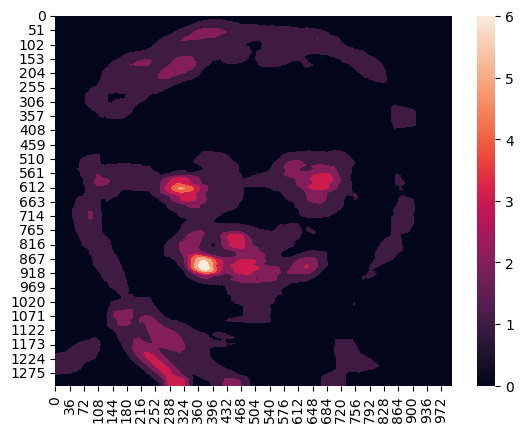

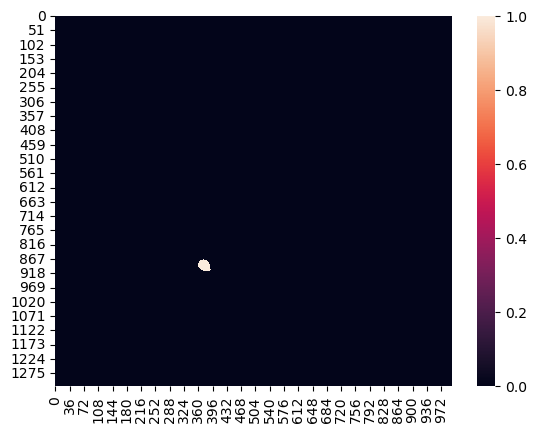

In [171]:
import plotly.express as px
Si=localEnergyStack(lapStacki)



for i in range(7):
    #fig = plt.figure(figsize=(8,8)) 
    #fig.add_subplot(1, 8, i+1)
    fig1 = sn.heatmap(data=np.array(Si[i]))
    plt.show()


    #plt.imshow(Si[i],cmap="gray")

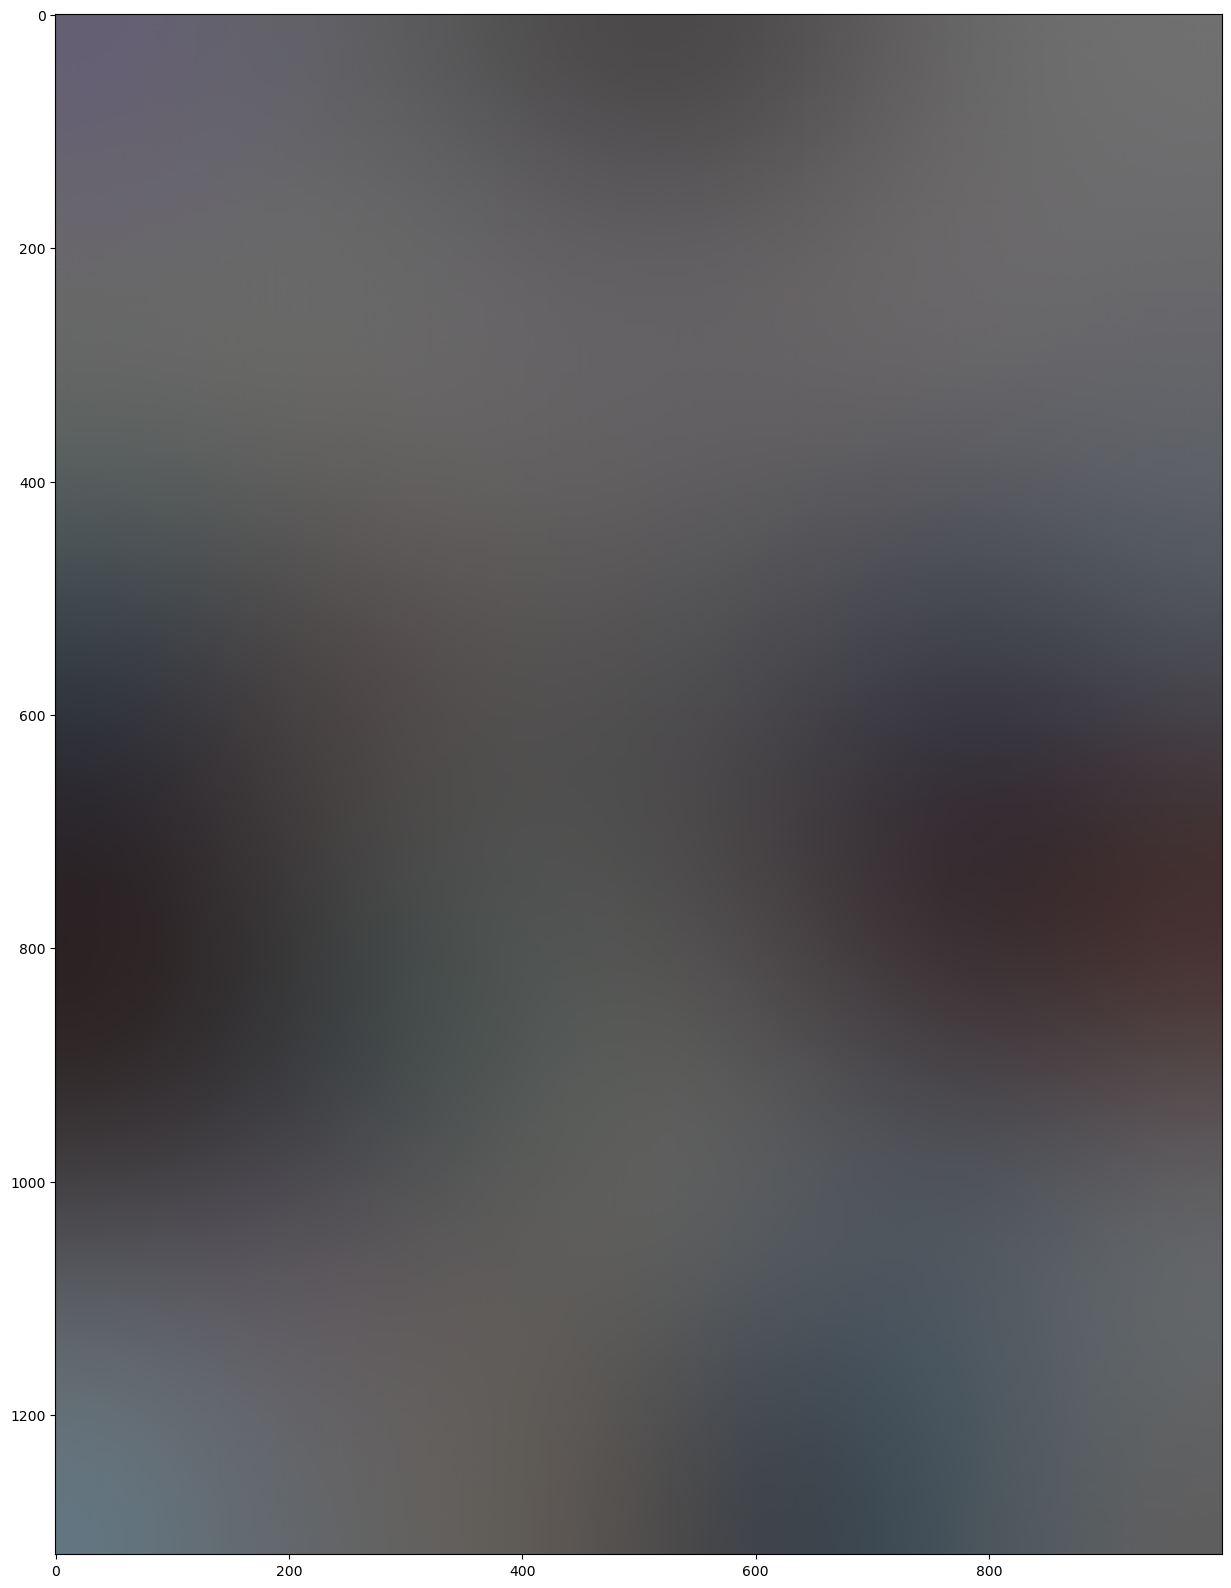

In [69]:
Sr=localEnergyStack(lapStackr)
fig = plt.figure(figsize=(20, 20)) 

for i in range(7):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(Sr[i],cmap="gray")

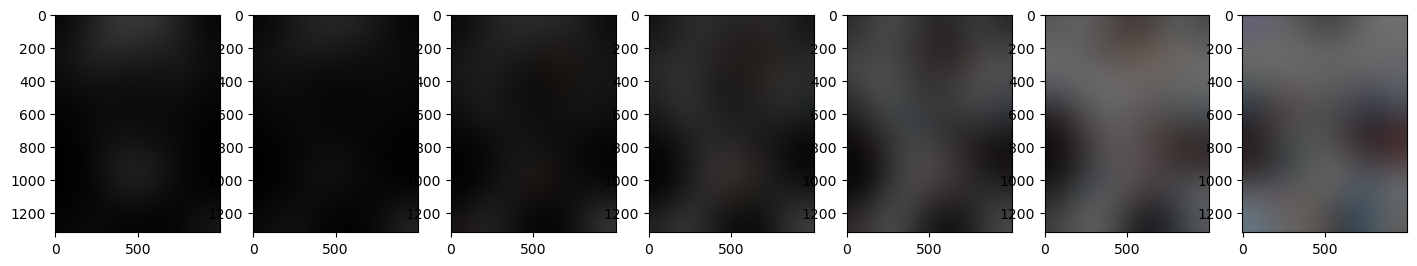

In [72]:
fig = plt.figure(figsize=(20, 20)) 
for i in range(7):

    fig.add_subplot(1, 8, i+1)
    plt.imshow(Sr[i],cmap="Spectral")